In [38]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [39]:
from sklearn.datasets import load_iris

# Decision tree
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

In [40]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [41]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
y.shape

(150,)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

In [45]:
X_train_knn = X_train
X_test_knn = X_test
y_train_knn = y_train
y_test_knn = y_test

X_train_tree = X_train
X_test_tree = X_test
y_train_tree = y_train
y_test_tree = y_test

In [46]:
#tree_clf = DecisionTreeClassifier(max_depth=2)
# tree_clf.fit(X, y)

# Decision Tree

In [47]:
model_tree = DecisionTreeClassifier()

In [48]:
param_grid_tree = dict(max_depth = list(range(1,15)), criterion=['gini', 'entropy'])

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid_tree = GridSearchCV(model_tree, param_grid_tree, cv = 10, scoring='accuracy', return_train_score=True)
grid_tree.fit(X_train_tree, y_train_tree)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [51]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [52]:
grid_tree.best_score_

0.9666666666666667

In [53]:
y_predict_tree = grid_tree.predict(X_test_tree)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test_tree, y_predict_tree)

0.9

In [82]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
tree_clf.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=("D:/Ramez/Data Science/clso/Classification/iris_tree.dot"),
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [84]:
# from subprocess import check_call
# check_call(['dot','-Tpng',
#             'D:/Ramez/Data Science/clso/Classification/iris_tree.dot',
#             '-o','D:/Ramez/Data Science/clso/Classification/iris_tree.png'])

import pydot
(graph,) = pydot.graph_from_dot_file('D:/Ramez/Data Science/clso/Classification/iris_tree.dot')
graph.write_png('D:/Ramez/Data Science/clso/Classification/iris_tree.png')

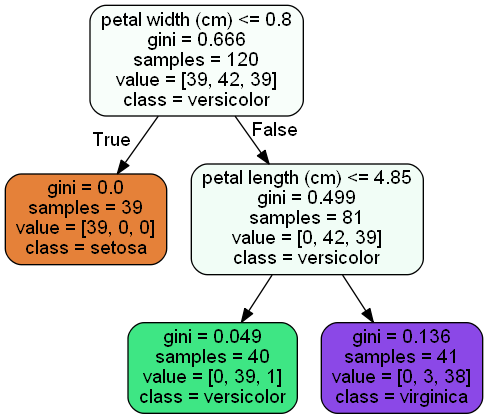

In [85]:
from IPython.display import Image
Image("D:/Ramez/Data Science/clso/Classification/iris_tree.png")

# K Nearest Neighbor